# Rainy or Sunny Hidden Markov Model

The example is drawn from the Wikipedia <a ref=https://en.wikipedia.org/wiki/Hidden_Markov_model#A_concrete_example>article</a> on Hidden Markov Models describing what Bob likes to do on rainy or sunny days.

### Weather guessing game
Consider two friends, Alice and Bob, who live far apart from each other and who talk together daily over the telephone about what they did that day. Bob is only interested in three activities: walking in the park, shopping, and cleaning his apartment. The choice of what to do is determined exclusively by the weather on a given day. Alice has no definite information about the weather, but she knows general trends. Based on what Bob tells her he did each day, Alice tries to guess what the weather must have been like.

Alice believes that the weather operates as a discrete Markov chain. There are two states, "Rainy" and "Sunny", but she cannot observe them directly, that is, they are hidden from her. On each day, there is a certain chance that Bob will perform one of the following activities, depending on the weather: "walk", "shop", or "clean". Since Bob tells Alice about his activities, those are the observations. The entire system is that of a hidden Markov model (HMM).

Alice knows the general weather trends in the area, and what Bob likes to do on average. In other words, the parameters of the HMM are known. They can be represented as follows in Python:

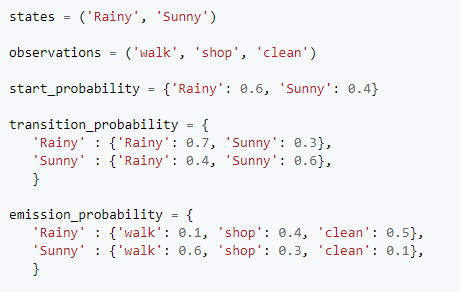

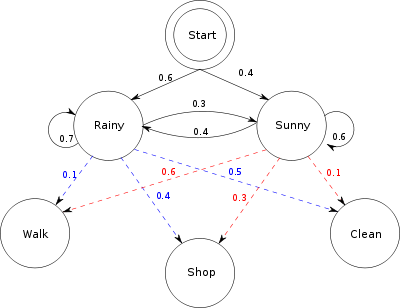

In [3]:
!pip install pomegranate==0.14.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 63.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pomegranate: filename=pomegranate-0.14.4-cp310-cp310-linux_x86_64.whl size=20180511 sha256=25d197a4ddbdbc9d887b5485d6747daf17d19993ab4d2ebed53ac0d0970a9de8
  Stored in directory: /root/.cache/pip/wheels/c8/26/27/28f0bc0101848242fea42e1e21801f7aff28685f8295ab9550
Successfully built pomegranate


In [4]:

# from pomegranate import *
from pomegranate import HiddenMarkovModel, State, DiscreteDistribution
import random
import math

random.seed(0)

We first create a `HiddenMarkovModel` object, and name it "Rainy-Sunny".

In [5]:
model = HiddenMarkovModel( name="Rainy-Sunny" )

- We then create the two possible states of the model, "rainy" and "sunny". In the state definitin we will provide the **emission probabilities** of the state.
- We make them both discrete distributions, with the possibilities of Bob either walking, shopping, or cleaning.
![image-2.png](attachment:image-2.png)

In [ ]:
# rainyEmission = DiscreteDistribution({ 'walk': 0.1, 'shop': 0.4, 'clean': 0.5 })
# rainy = State(rainyEmission, name='Rainy')

In [6]:
rainy = State( DiscreteDistribution({ 'walk': 0.1, 'shop': 0.4, 'clean': 0.5 }), name='Rainy' )
sunny = State( DiscreteDistribution({ 'walk': 0.6, 'shop': 0.3, 'clean': 0.1 }), name='Sunny' )

- We then add the transitions probabilities, starting with the probability the model starts as sunny or rainy.
- We then add the transition matrix. We make sure to subtract 0.05 from each probability to add to the probability of exiting the hmm.
- Last, we add transitions to mark the end of the model
- The data does not give us end transition probability. Hence, we have reduced each of the above transition probabilities by 0.05. That way, we will assume the **probabilities as 0.1 for both rainy->end and sunny->end**
![image.png](attachment:image.png)

In [7]:
# start state transition to other states
model.add_transition( model.start, rainy, 0.6 )
model.add_transition( model.start, sunny, 0.4 )

# state to state transitions
model.add_transition( rainy, rainy, 0.65 )
model.add_transition( rainy, sunny, 0.25 )
model.add_transition( sunny, rainy, 0.35 )
model.add_transition( sunny, sunny, 0.55 )

# all state transitions to end state
model.add_transition( rainy, model.end, 0.1 )
model.add_transition( sunny, model.end, 0.1 )

Finally we "bake" the model, finalizing its structure.

In [8]:
model.bake( verbose=True )

Now lets check on Bob each hour and see what he is doing! In other words lets create a sequence of observations.

In [9]:
sequence = [ 'walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean', 'shop','walk','walk' ]

In [10]:
# Getting the hidden states for the new observed sequence
def Decoding(sequence, model):
    _, state_path = model.viterbi(sequence)
    return [state[1].name for state in state_path[1:-1]]

In [11]:
Hidden_tags = Decoding(sequence, model)
print(sequence)
print(Hidden_tags)

['walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean', 'shop', 'walk', 'walk']
['Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Sunny']


In [12]:
seq1 = ['walk', 'walk', 'shop', 'walk', 'clean', 'walk', 'shop']

In [13]:
Hidden_tags = Decoding(seq1, model)
print(sequence)
print(Hidden_tags)

['walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean', 'shop', 'walk', 'walk']
['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny']


In [14]:
_, state_path = model.viterbi(sequence)

In [15]:
state = state_path[1]
state[1].name

'Sunny'

In [16]:
state_path

[(2,
  {
      "class" : "State",
      "distribution" : null,
      "name" : "Rainy-Sunny-start",
      "weight" : 1.0
  }),
 (1,
  {
      "class" : "State",
      "distribution" : {
          "class" : "Distribution",
          "dtype" : "str",
          "name" : "DiscreteDistribution",
          "parameters" : [
              {
                  "walk" : 0.6,
                  "shop" : 0.3,
                  "clean" : 0.1
              }
          ],
          "frozen" : false
      },
      "name" : "Sunny",
      "weight" : 1.0
  }),
 (0,
  {
      "class" : "State",
      "distribution" : {
          "class" : "Distribution",
          "dtype" : "str",
          "name" : "DiscreteDistribution",
          "parameters" : [
              {
                  "walk" : 0.1,
                  "shop" : 0.4,
                  "clean" : 0.5
              }
          ],
          "frozen" : false
      },
      "name" : "Rainy",
      "weight" : 1.0
  }),
 (0,
  {
      "class" : "State",


In [ ]:
state[1].name

'Sunny'

In [ ]:
# ['walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean']
# ['Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Rainy']

In [ ]:
state_path[2]

(0,
 {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "walk" : 0.1,
                 "shop" : 0.4,
                 "clean" : 0.5
             }
         ],
         "frozen" : false
     },
     "name" : "Rainy",
     "weight" : 1.0
 })

In [ ]:
state_path[2]

(0,
 {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "walk" : 0.1,
                 "shop" : 0.4,
                 "clean" : 0.5
             }
         ],
         "frozen" : false
     },
     "name" : "Rainy",
     "weight" : 1.0
 })

In [ ]:
state_path[1][1]

In [ ]:
state_path[1][1].name

In [ ]:
_, state_path = model.viterbi(sequence)
print([state_path[i][0] for i in range(len(state_path))])
print([state_path[i][1].name for i in range(len(state_path))])
print([state[1].name for state in state_path])

In [ ]:
state_path

##### Performance with and without Viterbi

In [20]:
# import datetime
# sequence = [ 'walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean', 'shop','walk','walk' ]
# st = datetime.datetime.now()
# Hidden_tags = Decoding(sequence, model)
# end = datetime.datetime.now()
# print("Time taken:", end - st)
# print(sequence)
# print(Hidden_tags)

# # manual implementataion
# def manualStatesCalc(sequence):
#   # your code to do manual calculations: no. of calculations: 2**len(sequence)
#   hidden_states = []
#   for i in range(0, len(sequence)):
#     # your manual calcuation for each sequence state
#   return hidden_states


# sequence = [ 'walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean', 'shop','walk','walk' ]
# st = datetime.datetime.now()
# Hidden_tags = manualStatesCalc(sequence)
# end = datetime.datetime.now()
# print("Time taken:", end - st)
# print(sequence)
# print(Hidden_tags)

Time taken: 0:00:00.000246
['walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean', 'shop', 'walk', 'walk']
['Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Sunny']


##### Experimental code

In [ ]:
from pomegranate import *
dists = [NormalDistribution(5, 1), NormalDistribution(1, 7), NormalDistribution(8,2)]
trans_mat = numpy.array([[0.7, 0.3, 0.0],
                             [0.0, 0.8, 0.2],
                             [0.0, 0.0, 0.9]])
starts = numpy.array([1.0, 0.0, 0.0])
ends = numpy.array([0.0, 0.0, 0.1])
model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends)

In [ ]:
# Building the same model line by line
from pomegranate import *
s1 = State(NormalDistribution(5, 1))
s2 = State(NormalDistribution(1, 7))
s3 = State(NormalDistribution(8, 2))
model = HiddenMarkovModel()
model.add_states(s1, s2, s3)
model.add_transition(model.start, s1, 1.0)
model.add_transition(s1, s1, 0.7)
model.add_transition(s1, s2, 0.3)
model.add_transition(s2, s2, 0.8)
model.add_transition(s2, s3, 0.2)
model.add_transition(s3, s3, 0.9)
model.add_transition(s3, model.end, 0.1)
model.bake()

Now lets check the probability of observing this sequence.

In [ ]:
print(math.e**model.forward( sequence )[ len(sequence), model.end_index ])

Then the probability that Bob will be cleaning a step 3 in this sequence.

In [ ]:
print(math.e**model.forward_backward( sequence )[1][ 2, model.states.index( rainy ) ])

The probability of the sequence occurring given it is Sunny at step 4 in the sequence.

In [ ]:
print(math.e**model.backward( sequence )[ 3, model.states.index( sunny ) ])

Finally the probable series of states given the above sequence.

In [ ]:
print(" ".join( state.name for i, state in model.maximum_a_posteriori( sequence )[1] ))